# Dictionaries
* **key-value pair**
    * **keys**
    * **values**
    
* `Dict()`

In [1]:
eng2sp = Dict()
eng2sp["one"] = "uno";

In [2]:
print(eng2sp)

Dict{Any, Any}("one" => "uno")

* `Dict(key1 => value1, key2 => value2,...)`

In [3]:
eng2sp = Dict("one" => "uno", "two" => "dos", "three" => "tres")

Dict{String, String} with 3 entries:
  "two"   => "dos"
  "one"   => "uno"
  "three" => "tres"

In [4]:
eng2sp["two"]

"dos"

In [5]:
eng2sp["four"]

LoadError: KeyError: key "four" not found

In [6]:
length(eng2sp)

3

* `keys()`

In [7]:
ks = keys(eng2sp);
print(ks)

["two", "one", "three"]

In [8]:
"one" ∈ ks

true

In [9]:
"uno" ∈ ks

false

* `values()`

In [10]:
vs = values(eng2sp)

ValueIterator for a Dict{String, String} with 3 entries. Values:
  "dos"
  "uno"
  "tres"

In [11]:
"tres" ∈ vs

true

**※** `∈` takes about the **same amount of time no matter how many items are in the dictionaries**; but for arrays, it searches the elements of the array in order, As the array gets longer, the search time get longer.

In [12]:
# counter the number of each elements apearing in array 
function histogram(s)
    d = Dict()
    for i in s
        if i ∉ keys(d)
            d[i] = 1;
        else
            d[i] += 1;
        end
    end
    d
end

histogram (generic function with 1 method)

* `get(Dic, key, default value(if there isn't key))`

In [13]:
h = histogram("banana")

Dict{Any, Any} with 3 entries:
  'n' => 2
  'a' => 3
  'b' => 1

In [14]:
get(h,'a',0)

3

In [15]:
get(h,"a",0)

0

In [16]:
get(h,'c', "哈")

"哈"

In [17]:
# counter the number of each elements apearing in array 
function histogram(s)
    d = Dict()
    for i in s
        d[i] = get(d,i,0) + 1;
    end
    d
end

histogram (generic function with 1 method)

In [18]:
h = histogram("banana")

Dict{Any, Any} with 3 entries:
  'n' => 2
  'a' => 3
  'b' => 1

## Looping

In [19]:
function printhist(h)
    for c in keys(h)
        println(c," ",h[c])
    end
end

printhist(histogram("parrot"))

a 1
r 2
p 1
o 1
t 1


In [20]:
function sortprinthist(h)
    for c in sort!(collect(keys(h)))
        println(c," ",h[c])
    end
end
sortprinthist(histogram("parrot"))

a 1
o 1
p 1
r 2
t 1


## Reverse Lookup
* from *value* to *key*

In [21]:
function reverselookup(d,v)
    kv = []
    for k in keys(d)
        if d[k] == v
            push!(kv,k)
        end
    end
    return kv
end

reverselookup (generic function with 1 method)

In [22]:
reverselookup(histogram("parrot"),2)

1-element Vector{Any}:
 'r': ASCII/Unicode U+0072 (category Ll: Letter, lowercase)

* `findall(isequal(value),Dic)`

In [23]:
findall(isequal(1),h)

1-element Vector{Char}:
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)

In [24]:
h = histogram("parrot")

Dict{Any, Any} with 5 entries:
  'a' => 1
  'r' => 2
  'p' => 1
  'o' => 1
  't' => 1

In [25]:
function invertdict(d)
    inverse = Dict();
    for key in keys(d)
        val = d[key]
        if val ∉ keys(inverse)
            inverse[val] = [key]
        else
            push!(inverse[val],key)
        end
    end
    inverse
end

invertdict (generic function with 1 method)

In [26]:
invertdict(histogram("parrot"))

Dict{Any, Any} with 2 entries:
  2 => ['r']
  1 => ['a', 'p', 'o', 't']

In [27]:
function invertdict2(d)
    inverse = Dict();
    for key in keys(d)
        val = d[key]
        inverse[val] = push!(get(inverse,val,[]),key)
    end
    inverse
end

invertdict2 (generic function with 1 method)

In [28]:
invertdict2(histogram("parrrroosaot"))

Dict{Any, Any} with 4 entries:
  4 => Any['r']
  2 => Any['a']
  3 => Any['o']
  1 => Any['s', 'p', 't']

## Memos
* track the result we has known in Dictionary, to improve the effect of program

In [29]:
known = Dict(0=>0,1=>1);
function fibonacci(n)
    if n ∈ keys(known)
        return known[n];
    end
    res = fibonacci(n-1) + fibonacci(n-2)
    known[n] = res;
    res
end

fibonacci (generic function with 1 method)

In [30]:
function fibonacci2(n)
    if n == 1
        return 1
    elseif n == 0
        return 0
    end
    res = fibonacci2(n-1) + fibonacci2(n-2)
    res
end

fibonacci2 (generic function with 1 method)

* test and plot

┌ Info: For saving to png with the Plotly backend ORCA has to be installed.
└ @ Plots /home/me/.julia/packages/Plots/8GUYs/src/backends.jl:363


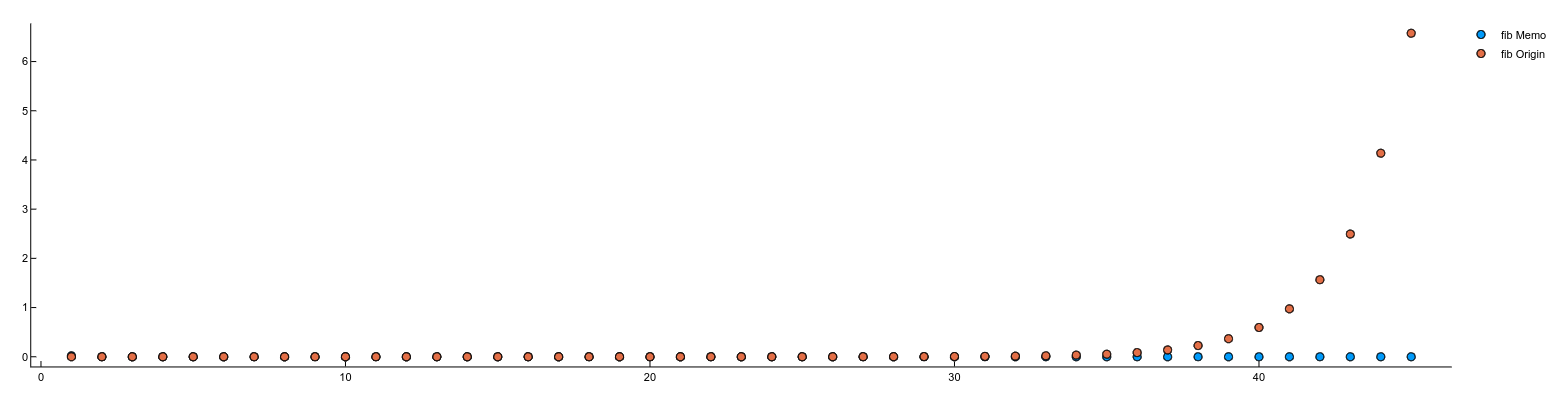

In [31]:
time1 = [];
time2 = [];
for i in 1:45
    push!(time1, (@timed fibonacci(i)).time)
    push!(time2, (@timed fibonacci2(i)).time)
end

using Plots
plotly()
plot(
    [time1,time2],
    seriestype=:scatter,
    label=["fib Memo" "fib Origin"], 
    legend=:outerbottomright,
    grid = :none,
)

## Global Variables

In [32]:
verbose = true
function example1()
    if verbose
        print("Running Example1")
    end
end

example1 (generic function with 1 method)

In [33]:
example1()

Running Example1

* `global v_name`

In [34]:
counter = 0
function example3()
    global counter
    counter += 1
end

for i in 1:3
    example3()
end

print(counter)

3

* `const v_name`

In [35]:
const known2 = Dict(0 => 0,1 => 1)
function example4()
    known2[2] = 1
    known2[100] = 2
end

example4()
print(known2)

Dict(0 => 0, 2 => 1, 1 => 1, 100 => 2)

In [36]:
function invertdict3(d)
    inverse = Dict();
    for key in keys(d)
        val = d[key]
        inverse[val] = push!(get!(inverse,val,[]),key)
    end
    inverse
end

invertdict3 (generic function with 1 method)

In [37]:
invertdict3(histogram("parrrroosaot"))

Dict{Any, Any} with 4 entries:
  4 => Any['r']
  2 => Any['a']
  3 => Any['o']
  1 => Any['s', 'p', 't']